First we're going to import relevant libraries and load our data:

In [178]:
import pandas as pd
raw = pd.read_csv('C:\\Users\Selfisher\Desktop\data.csv', '\t') # read more about this data in the readme file

In [179]:
raw.head(5) # Let's see how the data looks like

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [113]:
raw = raw.drop('age', axis=1).drop('engnat', axis=1).drop('race', axis=1).drop('hand', axis=1).drop('source', axis=1)
# droping these columns for now, but the country column might be relevant

In [115]:
raw.head()

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,2,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
2,2,PK,5,1,1,4,5,1,1,5,...,4,5,5,1,5,1,5,5,5,5
3,2,RO,2,5,2,4,3,4,3,4,...,4,3,5,2,4,2,5,2,5,5
4,2,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3


In [117]:
countries = pd.DataFrame(raw['country'].value_counts())
countries.median() # there are alot of countries with very few subjects

country    10.0
dtype: float64

In [118]:
countries = countries.loc[countries['country'] >= 500]
countries.median()

country    1219.0
dtype: float64

In [119]:
len(countries) # so we're left with 6 countries

6

In [120]:
raw = raw.loc[raw['country'].isin(countries.index)] # keep only those countries

In [124]:
len(raw['country'].value_counts()) # seems like it worked!

6

Now the problem is that most skl algorithms dont know how to use strings for their predictions. So, we will split
the column 'country' into 6 columns of countries which will contain ones and zeros:
one if the subject is from the column's name (country)
or zero if not.
in each row there sould be exactly one "1".

In [122]:
raw['country'].str.get_dummies() # most of the subjects are from the US

,AU,CA,GB,IN,PH,US
0,0,0,0,0,0,1
1,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,0,0,0,1
...,...,...,...,...,...,...
19712,0,0,0,0,0,1
19713,0,0,0,0,0,1
19715,0,0,0,0,0,1
19716,0,0,0,0,0,1


In [125]:
n_data = raw.join(raw['country'].str.get_dummies(), how='right') # combining the two data frames into a n_data

In [126]:
n_data.head()

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O7,O8,O9,O10,AU,CA,GB,IN,PH,US
0,1,US,4,2,5,2,5,1,4,3,...,4,2,5,5,0,0,0,0,0,1
1,2,US,2,2,3,3,3,3,1,5,...,3,1,3,2,0,0,0,0,0,1
4,2,US,3,1,3,3,3,1,3,1,...,3,1,5,3,0,0,0,0,0,1
5,2,US,1,5,2,4,1,3,2,4,...,5,4,5,3,0,0,0,0,0,1
6,2,US,5,1,5,1,5,1,5,4,...,4,3,3,4,0,0,0,0,0,1


In [127]:
n_data = n_data.drop('country', axis=1) # we ahve no use for the 'country' column now

In [128]:
n_data.head(5) 

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O7,O8,O9,O10,AU,CA,GB,IN,PH,US
0,1,4,2,5,2,5,1,4,3,5,...,4,2,5,5,0,0,0,0,0,1
1,2,2,2,3,3,3,3,1,5,1,...,3,1,3,2,0,0,0,0,0,1
4,2,3,1,3,3,3,1,3,1,3,...,3,1,5,3,0,0,0,0,0,1
5,2,1,5,2,4,1,3,2,4,1,...,5,4,5,3,0,0,0,0,0,1
6,2,5,1,5,1,5,1,5,4,4,...,4,3,3,4,0,0,0,0,0,1


In [129]:
n_data['gender'] = n_data['gender'] - 1 # now 1 is female and 0 is male

In [131]:
n_data['gender'].value_counts()

 1    8943
 0    5253
 2      80
-1      19
Name: gender, dtype: int64

In [132]:
n_data = n_data.loc[n_data['gender']!=2] # 3 was "other"

In [133]:
n_data = n_data.loc[n_data['gender']!=-1] # 0 was "rather not say"

In [134]:
n_data['gender'].value_counts() # now it's binary

1    8943
0    5253
Name: gender, dtype: int64

In [86]:
n_data.head(5)

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O7,O8,O9,O10,AU,CA,GB,IN,PH,US
0,0,4,2,5,2,5,1,4,3,5,...,4,2,5,5,0,0,0,0,0,1
1,1,2,2,3,3,3,3,1,5,1,...,3,1,3,2,0,0,0,0,0,1
4,1,3,1,3,3,3,1,3,1,3,...,3,1,5,3,0,0,0,0,0,1
5,1,1,5,2,4,1,3,2,4,1,...,5,4,5,3,0,0,0,0,0,1
6,1,5,1,5,1,5,1,5,4,4,...,4,3,3,4,0,0,0,0,0,1


In [136]:
from sklearn.utils import shuffle

In [137]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [140]:
n_data = shuffle(n_data)

In [90]:
to = 2000
train = n_data[:to]
test = n_data[to:]

In [91]:
trainx = train.drop('gender',axis=1)
trainy = train['gender']

In [141]:
import sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB# best we got is 0.64 accuracy for 0.65 male to female ratio - not good


In [142]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier    # binarize=1.6- for power trick binarize=0.65-no trick
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [104]:
reg = linear_model.LogisticRegression() 

In [102]:
reg = linear_model.LinearRegression() # this model can't use binary data. coutry of origin in this case

In [96]:
reg = KNeighborsClassifier(n_neighbors=40)

In [143]:
reg = linear_model.RidgeClassifierCV() # best so far - we got a 0.75 f1 score

In [31]:
score = cross_val_score(reg, trainx, trainy, cv=5)

In [32]:
n_data = shuffle(n_data)


In [148]:
scrs = [] 
n_to = int(to/5)
tms = 100
for i in range(tms):
    train = shuffle(train) # shuffling the train DF
    trainx = train.drop('gender',axis=1)
    trainy = train['gender']
    reg.fit(trainx[:n_to],trainy[:n_to])
    output = reg.predict(trainx[n_to:])
    scrs.append(sklearn.metrics.f1_score(trainy[n_to:], output)) # adding the f1 score to the list
sum(scrs)/tms 

0.7566183859102661

In [154]:
scrs = []
g_rate = [] # this will later tell us what the female to male ratio was when the prediction took place
tms = 50
for i in range(tms):
    n_data = shuffle(n_data)
    train = n_data[:to]
    trainx = train.drop('gender',axis=1)
    trainy = train['gender']
    scrs.append(cross_val_score(reg, trainx, trainy, cv=5).mean())
    g_rate.append(len(train.loc[train['gender'] == 0]) / len(train.loc[train['gender'] == 1]))
sum(scrs) / len(scrs) - sum(g_rate) / len(g_rate)
# this shows us the difference between the avg of the accuracy and the avg of the female to male ratio in those tests
# so the number we see is the number of percents the model is more acuurate than just guessing 'female' every time

0.11119105776044813

In [155]:
from matplotlib import pyplot as plt
import seaborn as sns

In [156]:
mal = n_data.loc[n_data['gender']==0]
fem = n_data.loc[n_data['gender']==1][:len(mal)]
plot_d = fem.append(mal) 
# making new DataFrame that has a 1:1 femal to male ratio so the info we get will not be bias

In [157]:
len(fem)

5253

In [158]:
len(mal)

5253

Now we're looking for information to see which question should get more or less weight

In [160]:
chrs = {'O','C','E','A','N'}
qs = []
diff = []
for c in chrs:
    print(c+' : ')
    for i in range(10):
        s = c+str(i+1)
        print(s+' : '+str(abs(plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean())))
        qs.append(s)
        diff.append(abs(plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean()))

A : 
A1 : 0.3714068151532457
A2 : 0.2274890538739771
A3 : 0.305539691604797
A4 : 0.37730820483533245
A5 : 0.40186560060917587
A6 : 0.37597563297163505
A7 : 0.347420521606701
A8 : 0.31677136874167156
A9 : 0.3738815914715401
A10 : 0.1509613554159528
N : 
N1 : 0.594327051208833
N2 : 0.41519131924614516
N3 : 0.44279459356558126
N4 : 0.12488102036931314
N5 : 0.19817247287264417
N6 : 0.42851703788311424
N7 : 0.2703217209213782
N8 : 0.32000761469636396
N9 : 0.25604416523891116
N10 : 0.12050256996002284
E : 
E1 : 0.020559680182752338
E2 : 0.33847325337902134
E3 : 0.04930515895678633
E4 : 0.16809442223491367
E5 : 0.1936036550542548
E6 : 0.23872073101085123
E7 : 0.10051399200456856
E8 : 0.03845421663811166
E9 : 0.25909004378450406
E10 : 0.013135351227869574
O : 
O1 : 0.1907481439177614
O2 : 0.2415762421473442
O3 : 0.05101846563868229
O4 : 0.1541976013706452
O5 : 0.2219683990100898
O6 : 0.04435560632019797
O7 : 0.1530553969160482
O8 : 0.259661146011803
O9 : 0.01351608604606902
O10 : 0.21454407005

<function matplotlib.pyplot.show(close=None, block=None)>

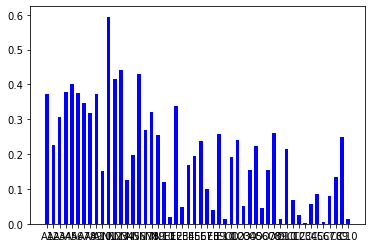

In [161]:
plt.bar(qs,diff, color='b',width=0.6)
plt.show 
#Some questions are more important than others. Let's use that:

In [159]:
for i in range(len(diff)):
    if diff[i] < 0.05:
        n_data = n_data.drop(qs[i], axis=1)

<AxesSubplot:>

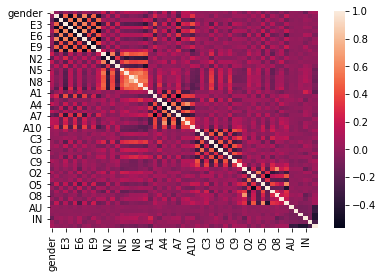

In [172]:
sns.heatmap(n_data.corr())

In [173]:
#n_data.corr()#['gender'].sort_values() # another way of seeing which questions are more coorelated with gender 

In [164]:
reg.fit(trainx[:n_to],trainy[:n_to])

sklearn.metrics.f1_score(test['gender'], reg.predict(test.drop('gender', axis=1)))

0.7357368753953194